<a href="https://colab.research.google.com/github/MimaDalix/Deep-Learning-tensorflow/blob/main/Transfer_Learning_MobileNetV2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning with MobileNetV2 

## Downloading and becoming one with the data

In [1]:
# Get the data 
import zipfile

# Download the data 
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip 

# Unzip the downloaded file 
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2022-10-15 19:51:21--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.111.128, 142.251.16.128, 142.251.163.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   130MB/s    in 1.2s    

2022-10-15 19:51:22 (130 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [2]:
# Count the images in each folder 
import os 

# Walk through 10 percent data directory and list number of files 
for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirpath)} directories and {len(filenames)} images in '{dirpath}'. ")

There are 26 directories and 0 images in '10_food_classes_10_percent'. 
There are 32 directories and 0 images in '10_food_classes_10_percent/train'. 
There are 38 directories and 75 images in '10_food_classes_10_percent/train/ramen'. 
There are 38 directories and 75 images in '10_food_classes_10_percent/train/sushi'. 
There are 42 directories and 75 images in '10_food_classes_10_percent/train/hamburger'. 
There are 46 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'. 
There are 38 directories and 75 images in '10_food_classes_10_percent/train/steak'. 
There are 42 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'. 
There are 38 directories and 75 images in '10_food_classes_10_percent/train/pizza'. 
There are 47 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'. 
There are 43 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'. 
There are 46 directories and 75 images in '10_food_clas

## Creating data loaders (Data Preparing)

We'll use the `ImageDataGenerator` class to load in our data in batches.

In [3]:
# Setup data inputs 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print('Training images:')
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                                          target_size=IMAGE_SHAPE,
                                                          batch_size=BATCH_SIZE,
                                                          class_mode='categorical')

print('Testing images:')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMAGE_SHAPE,
                                             batch_size=BATCH_SIZE,
                                             class_mode='categorical')

Training images:
Found 750 images belonging to 10 classes.
Testing images:
Found 2500 images belonging to 10 classes.


In [ ]:
# Setting up a TensorBoard callback


## Creating the model using Tensorflow Hub

In [5]:
# Get the url 
mobilenetV2_url = 'https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5' 

In [4]:
# Import the depedencies
import tensorflow as tf 
import tensorflow_hub as hub
from tensorflow.keras import layers

In [9]:
# Let's reuse the create_model() function to create a model from a URL
def create_model(model_url, num_classes):
    """ 
    Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.

    Args:
    model_url (str): A TensorFlwo Hub feature extraction URL.
    num_classes (int): Number of output neurons in the output layer,
    should be equal to number of target classes, default 10.

    Returns:
    An uncompiled Keras Sequential model with model_url as feature extractor 
    layer and Dense output layer with num_classes output neurons
    """
    # Download the pretrained model and use it as a Keras layer
    feature_extractor_layer = hub.KerasLayer(model_url,
                                            trainable=False,
                                            name='feature_extraction_layer',
                                            input_shape=IMAGE_SHAPE+(3,))
    
    # Creating the model 
    model = tf.keras.Sequential([
        feature_extractor_layer,
        layers.Dense(num_classes, activation='softmax', name='output_layer')
    ])

    return model 

## Creating and testing MobileNetV2 feature extraction model 

In [11]:
# Create MobileNet model 
mobilenet_model = create_model(mobilenetV2_url, num_classes=train_data_10_percent.num_classes)

# Compile the model 
mobilenet_model.compile(loss='categorical_crossentropy',
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['accuracy'])

# Fit the model 
mobilenet_history = mobilenet_model.fit(train_data_10_percent,
                                        epochs=5, 
                                        steps_per_epoch=len(train_data_10_percent),
                                        validation_data=test_data,
                                        validation_steps=len(test_data))

Epoch 1/5
24/24 [==============================] - 73s 3s/step - loss: 1.9284 - accuracy: 0.3480 - val_loss: 1.2747 - val_accuracy: 0.6032
Epoch 2/5
24/24 [==============================] - 68s 3s/step - loss: 1.0231 - accuracy: 0.7107 - val_loss: 0.8769 - val_accuracy: 0.7460
Epoch 3/5
24/24 [==============================] - 79s 3s/step - loss: 0.7197 - accuracy: 0.8107 - val_loss: 0.7421 - val_accuracy: 0.7728
Epoch 4/5
24/24 [==============================] - 68s 3s/step - loss: 0.5733 - accuracy: 0.8547 - val_loss: 0.7083 - val_accuracy: 0.7696
Epoch 5/5
24/24 [==============================] - 68s 3s/step - loss: 0.4826 - accuracy: 0.8880 - val_loss: 0.6352 - val_accuracy: 0.8052


In [12]:
# Let's create a function to plot our loss curves 
# Tidbit you could put a function like this into a script called "helper.py" and import it when needed
import matplotlib.pyplot as plt 

def plot_loss_curves(history):
  """
  Return separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow History object.

  Returns:
  Plots of training/validation loss and accuracy metrics.

  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss 
  
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='validation_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # Plot the accuracy curve
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='validation_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

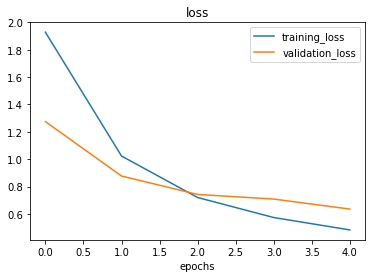

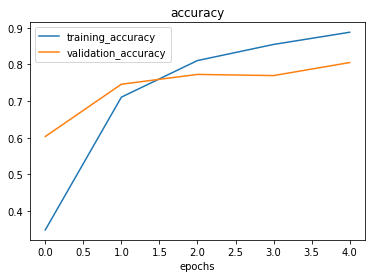

In [13]:
plot_loss_curves(mobilenet_history)